In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import os

filepath=os.path.split(os.getcwd())[0]

col_names=['Gender','Symptoms','Alcohol','Hep_b_surf_antigen','Hep_b_e_antigen','Hep_b_core_antibody',\
           'Hep_c_vir_antibody','Cirrhosis','Endemic_countries','Smoking','Diabetes','Obesity','Hemochromatosis',\
           'Arterial_hypertension','Chronic_ren_insufficiency','HIV','Nonalcoholic_steatohepatitis',\
           'Esophageal_varices','Splenomegaly','Portal_hypertension','Portal_vein_thrombosis','Liver_metastasis','Radiological_hallmark',\
           'Age','Grams_alc_per_day','Packs_cigarettes_per_year','Performance_status','Encefalopathy_degree',\
           'Ascites_degree','International_norm_ratio','Alpha-Fetoprotein','Hemoglobin','Mean_corp_volume',\
           'Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase','Aspartate_transaminase',\
           'Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine','Nodule_num',\
           'Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin','Class']
df=pd.read_table(os.path.join(filepath,'data','hcc-data.txt'),sep=',',header=None,names=col_names,na_values="?")

y=df['Class']
X=df.loc[:, df.columns != 'Class'] 

# print(df.dtypes)
# print(df.isnull().sum(axis=0))

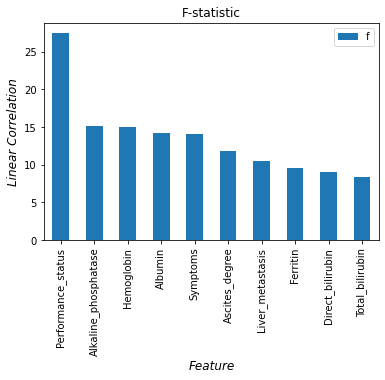

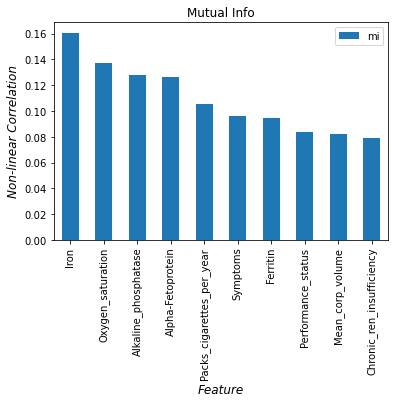

In [2]:
rs=1

from sklearn.feature_selection import f_classif, mutual_info_classif
#Linear correlation - F-stat
f_list=[]
mi_list=[]
for column in X.columns:
    df_copy=df.copy()
    column_df=df_copy[[column, 'Class']].dropna()
    f_stat,_=f_classif(column_df[column].to_numpy().reshape(-1, 1), column_df['Class'])
    mi=mutual_info_classif(column_df[column].to_numpy().reshape(-1, 1), column_df['Class'], copy=True, random_state=rs)
    mi_list.append(float(mi))
    f_list.append(float(f_stat))

f_stats=pd.DataFrame({'f':f_list,'features':X.columns})
f_sorted=f_stats.sort_values(by='f',ascending=False)
f_sorted.iloc[:10].plot.bar('features','f')
plt.ylabel('Linear Correlation',fontsize='large',fontstyle='oblique')
plt.xlabel('Feature',fontsize='large',fontstyle='oblique')
plt.title('F-statistic')
plt.savefig(os.path.join(filepath,'figures','fig24.png'), dpi=300, bbox_inches = "tight")
plt.show()

mis=pd.DataFrame({'mi':mi_list,'features':X.columns})
mi_sorted=mis.sort_values(by='mi',ascending=False)
mi_sorted.iloc[:10].plot.bar('features','mi')
plt.ylabel('Non-linear Correlation',fontsize='large',fontstyle='oblique')
plt.xlabel('Feature',fontsize='large',fontstyle='oblique')
plt.title('Mutual Info')
plt.savefig(os.path.join(filepath,'figures','fig25.png'), dpi=300, bbox_inches = "tight")
plt.show()

Gender
1    133
0     32
dtype: int64
Symptoms
1.0    94
0.0    53
dtype: int64
Alcohol
1    122
0     43
dtype: int64
Hep_b_surf_antigen
0.0    132
1.0     16
dtype: int64
Hep_b_e_antigen
0.0    125
1.0      1
dtype: int64
Hep_b_core_antibody
0.0    103
1.0     38
dtype: int64
Hep_c_vir_antibody
0.0    122
1.0     34
dtype: int64
Cirrhosis
1    149
0     16
dtype: int64
Endemic_countries
0.0    116
1.0     10
dtype: int64
Smoking
1.0    63
0.0    61
dtype: int64
Diabetes
0.0    106
1.0     56
dtype: int64
Obesity
0.0    135
1.0     20
dtype: int64
Hemochromatosis
0.0    135
1.0      7
dtype: int64
Arterial_hypertension
0.0    103
1.0     59
dtype: int64
Chronic_ren_insufficiency
0.0    143
1.0     20
dtype: int64
HIV
0.0    148
1.0      3
dtype: int64
Nonalcoholic_steatohepatitis
0.0    135
1.0      8
dtype: int64
Esophageal_varices
1.0    69
0.0    44
dtype: int64
Splenomegaly
1.0    84
0.0    66
dtype: int64
Portal_hypertension
1.0    110
0.0     44
dtype: int64
Portal_vein_thrombos

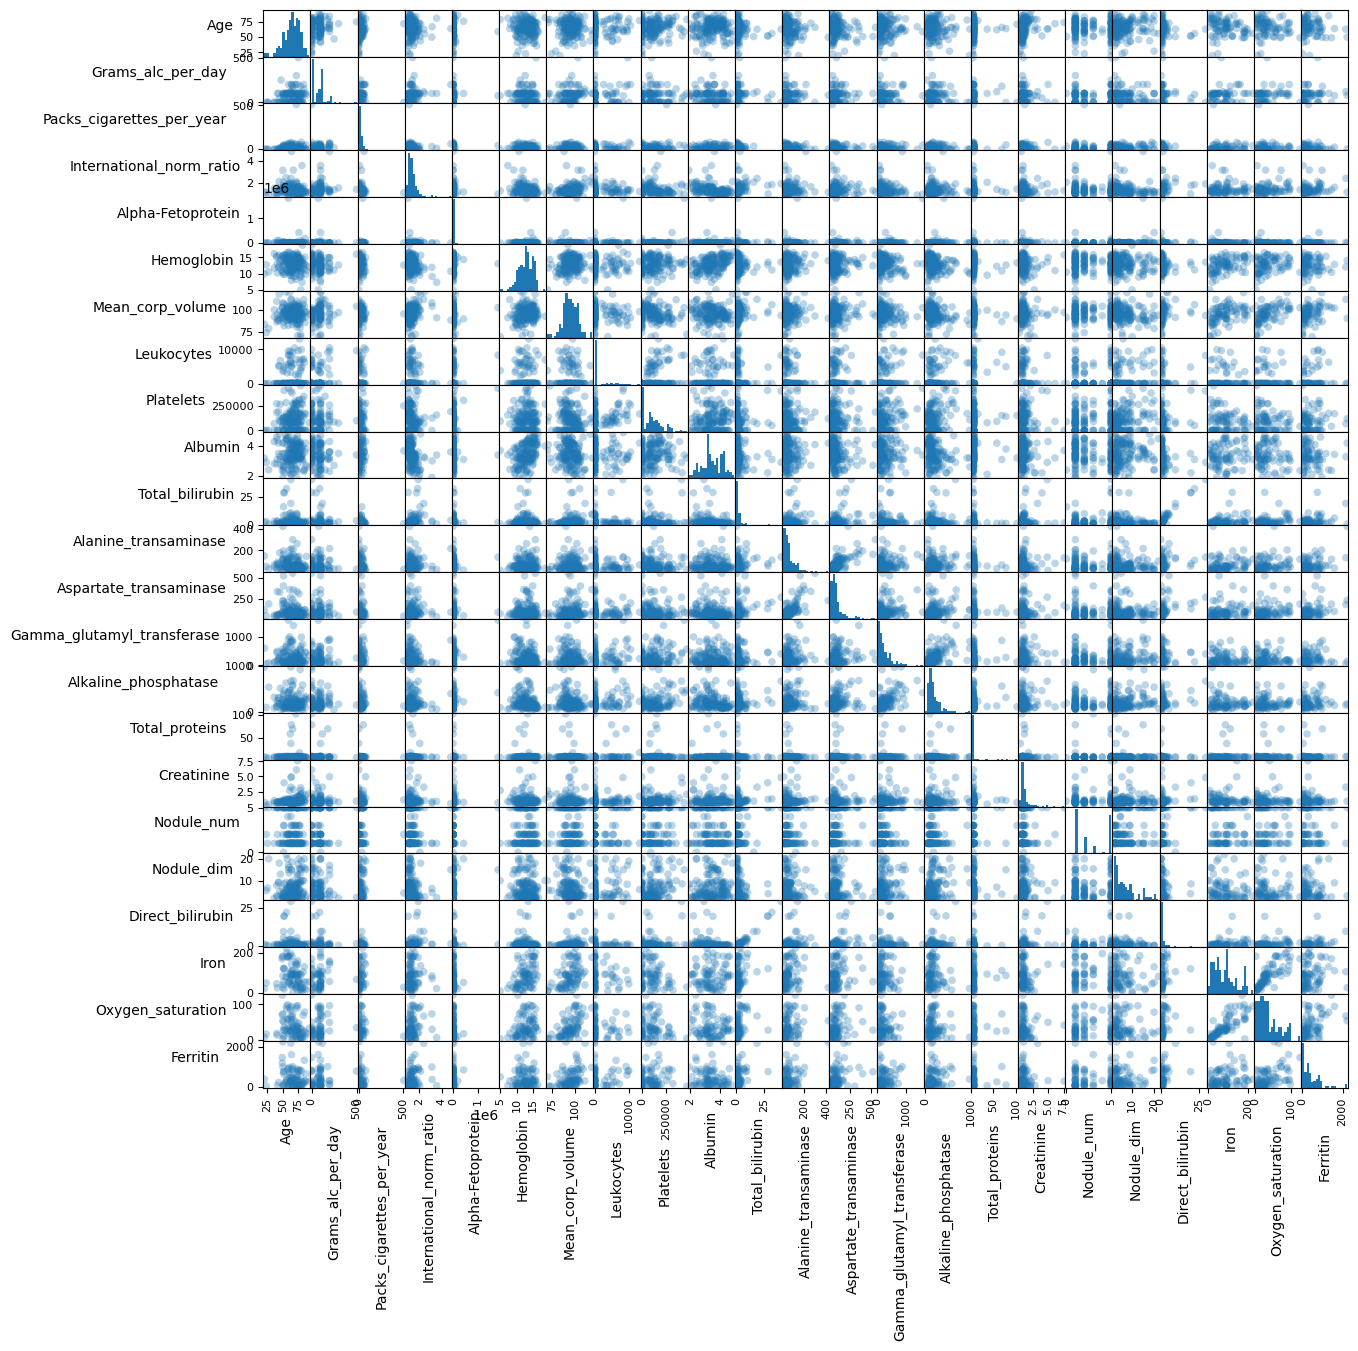

Class
1    102
0     63
dtype: int64


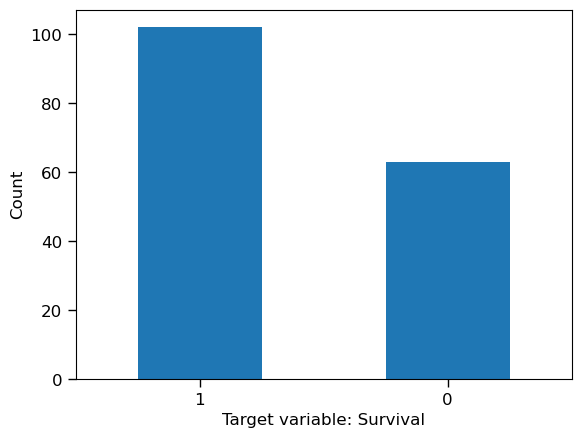

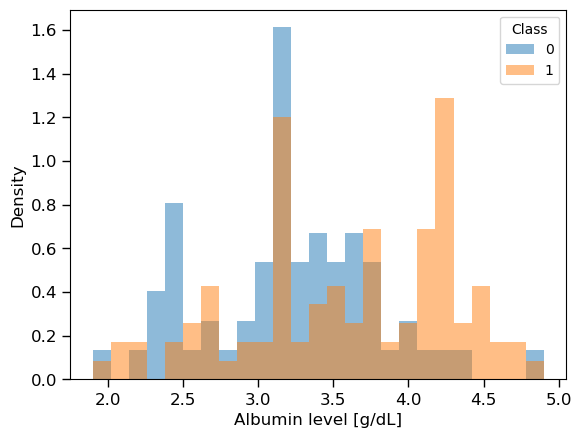

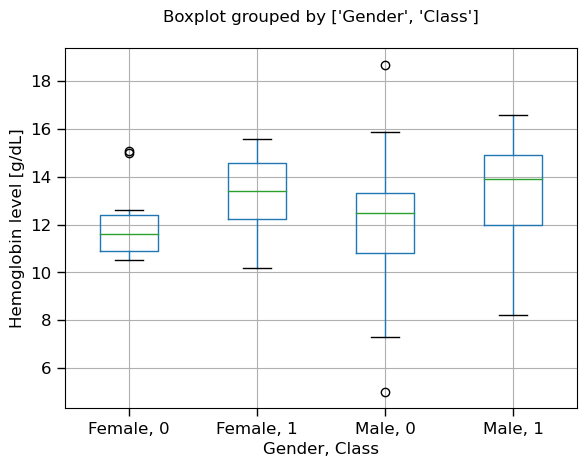

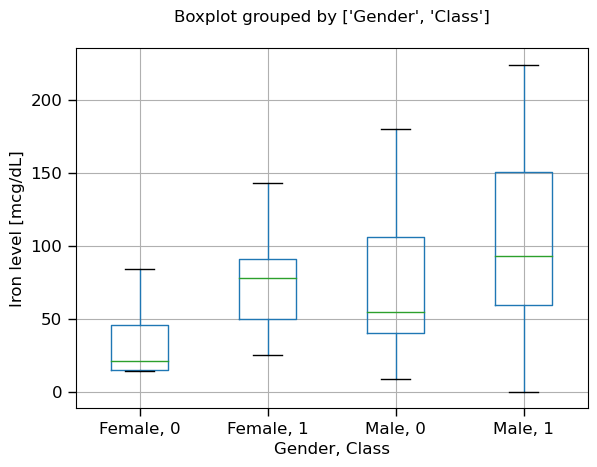

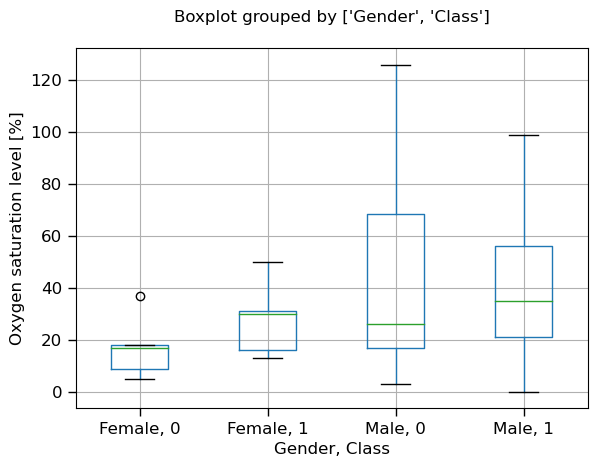

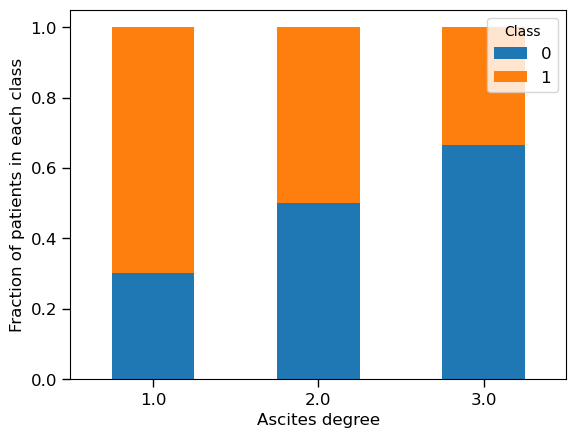

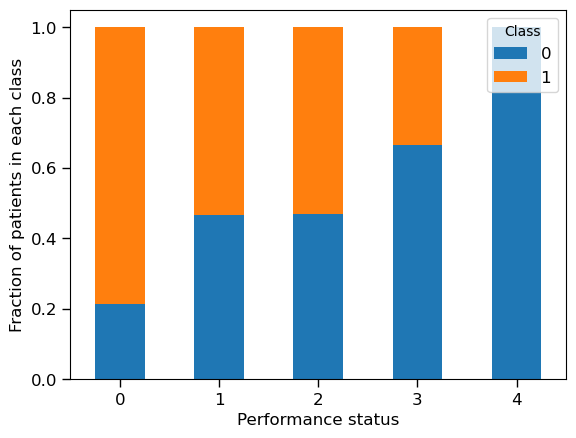

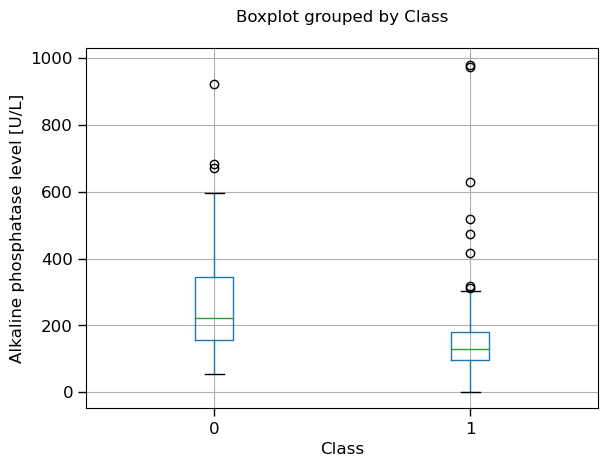

In [2]:
cat_ftrs=['Gender','Symptoms','Alcohol','Hep_b_surf_antigen','Hep_b_e_antigen','Hep_b_core_antibody',\
          'Hep_c_vir_antibody','Cirrhosis','Endemic_countries','Smoking','Diabetes','Obesity','Hemochromatosis',\
          'Arterial_hypertension','Chronic_ren_insufficiency','HIV','Nonalcoholic_steatohepatitis',\
          'Esophageal_varices','Splenomegaly','Portal_hypertension','Portal_vein_thrombosis','Liver_metastasis','Radiological_hallmark']
ord_ftrs=['Performance_status','Encefalopathy_degree','Ascites_degree']
std_ftrs=['Age','Grams_alc_per_day','Packs_cigarettes_per_year','International_norm_ratio','Alpha-Fetoprotein',\
          'Hemoglobin','Mean_corp_volume','Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase',\
          'Aspartate_transaminase','Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine',\
          'Nodule_num','Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin']

for column in cat_ftrs:
    print(df.value_counts(column))
for column in ord_ftrs:
    print(df.value_counts(column))
for column in std_ftrs:
    print(df[column].describe())
    
axes=pd.plotting.scatter_matrix(df[std_ftrs], figsize=(14, 14), marker='o', hist_kwds={'bins': 20}, s=30, alpha=.3)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.savefig(os.path.join(filepath,'figures','matrix.png'), dpi=300, bbox_inches = "tight")
plt.show()

print(df.value_counts('Class'))
pd.value_counts(df['Class']).plot.bar()
plt.xlabel('Target variable: Survival',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig1.png'), dpi=300, bbox_inches = "tight")
plt.show()

bin_range = (df['Albumin'].min(),df['Albumin'].max())
for c in [0,1]:
    plt.hist(df[df['Class']==c]['Albumin'],alpha=0.5,label=c,range=bin_range,bins=25,density=True)
plt.legend(title='Class')
plt.ylabel('Density',fontsize='large')
plt.xlabel('Albumin level [g/dL]',fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig2.png'), dpi=300, bbox_inches = "tight")
plt.show()

df[['Class','Hemoglobin','Gender']].boxplot(by=['Gender','Class'])
labels=['Female, 0','Female, 1','Male, 0','Male, 1']
plt.ylabel('Hemoglobin level [g/dL]',fontsize='large')
plt.xlabel('Gender, Class',fontsize='large')
plt.xticks([1,2,3,4],labels)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.title('')
plt.savefig(os.path.join(filepath,'figures','fig11.png'), dpi=300, bbox_inches = "tight")

df[['Class','Iron','Gender']].boxplot(by=['Gender','Class'])
labels=['Female, 0','Female, 1','Male, 0','Male, 1']
plt.ylabel('Iron level [mcg/dL]',fontsize='large')
plt.xlabel('Gender, Class',fontsize='large')
plt.xticks([1,2,3,4],labels)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.title('')
plt.savefig(os.path.join(filepath,'figures','fig21.png'), dpi=300, bbox_inches = "tight")

df[['Class','Oxygen_saturation','Gender']].boxplot(by=['Gender','Class'])
labels=['Female, 0','Female, 1','Male, 0','Male, 1']
plt.ylabel('Oxygen saturation level [%]',fontsize='large')
plt.xlabel('Gender, Class',fontsize='large')
plt.xticks([1,2,3,4],labels)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.title('')
plt.savefig(os.path.join(filepath,'figures','fig22.png'), dpi=300, bbox_inches = "tight")

count_matrix = df.groupby(['Ascites_degree','Class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of patients in each class',fontsize='large')
plt.xlabel('Ascites degree',fontsize='large')
plt.legend(title='Class',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig3.png'), dpi=300, bbox_inches = "tight")
            
count_matrix = df.groupby(['Performance_status','Class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of patients in each class',fontsize='large')
plt.xlabel('Performance status',fontsize='large')
plt.legend(title='Class',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig10.png'), dpi=300, bbox_inches = "tight")

df[['Class','Alkaline_phosphatase']].boxplot(by='Class')
plt.ylabel('Alkaline phosphatase level [U/L]',fontsize='large')
plt.xlabel('Class',fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.title('')
plt.savefig(os.path.join(filepath,'figures','fig4.png'), dpi=300, bbox_inches = "tight")
plt.show()



Fraction of features with missing values:  0.898
Fraction of data points with missing values:  0.9515
Fraction of data points with missing values for a continuous feature:  0.8364
Average fraction of missing values per feature:  0.10216450216450217


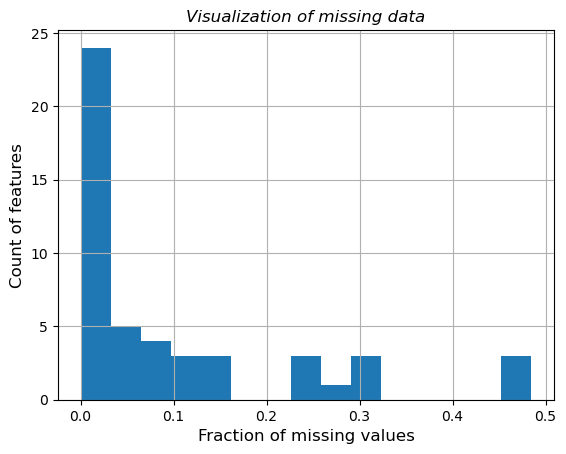

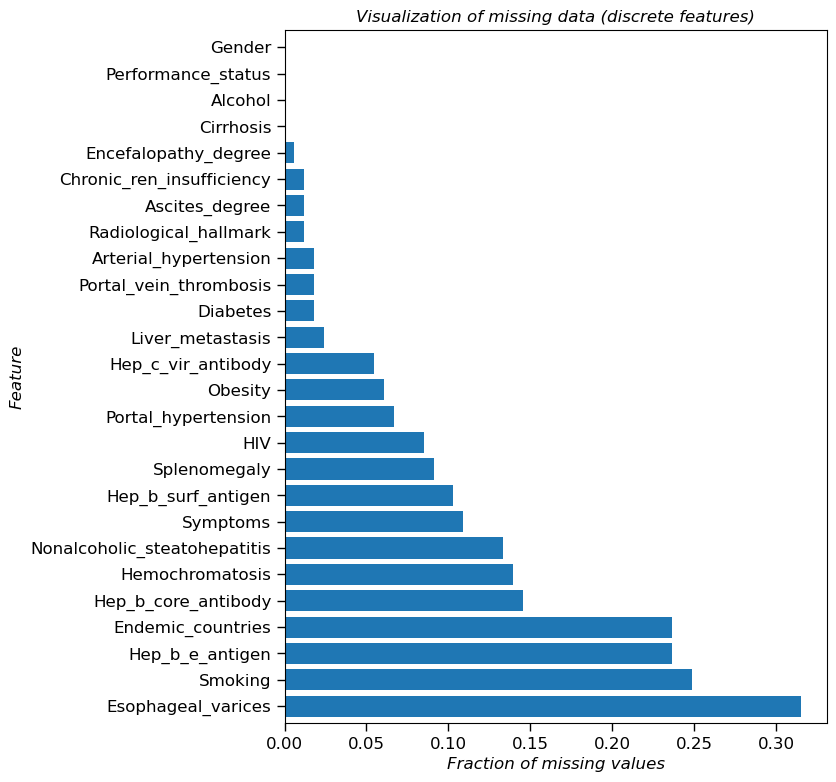

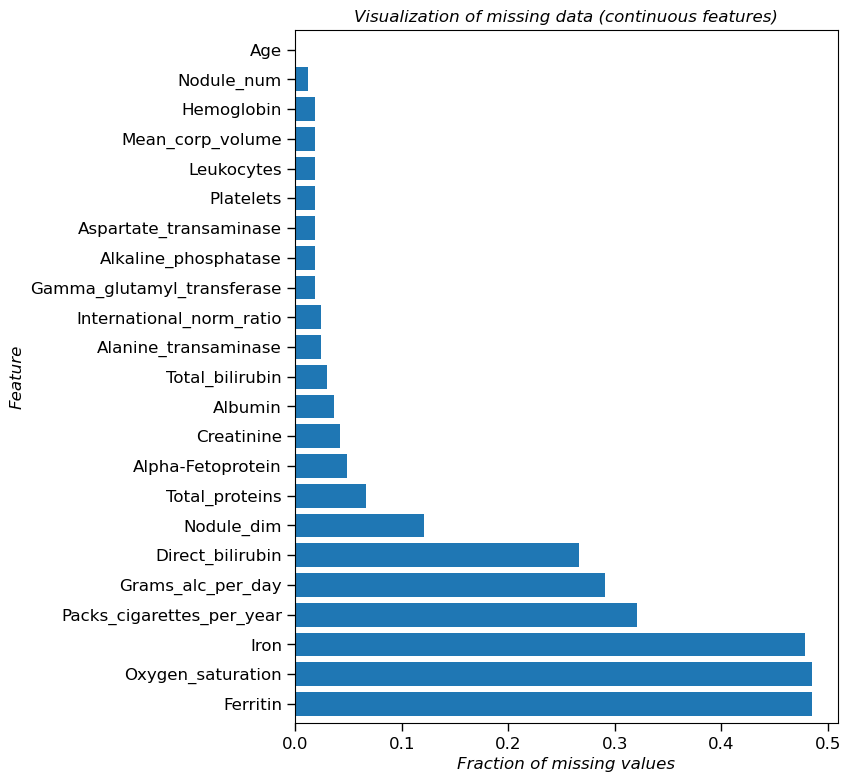

In [5]:
#Missing values
perc_missing_per_ftr = X.isnull().sum(axis=0)/X.shape[0]
missing_sorted=perc_missing_per_ftr.sort_values(ascending = True)
print('Fraction of features with missing values: ',np.around(sum(X.isnull().sum(axis=0)!=0)/X.shape[1],4))
print('Fraction of data points with missing values: ',np.around(sum(X.isnull().sum(axis=1)!=0)/X.shape[0],4))
print('Fraction of data points with missing values for a continuous feature: ',np.around(sum(X[std_ftrs].isnull().sum(axis=1)!=0)/X[std_ftrs].shape[0],4))
print('Average fraction of missing values per feature: ',np.mean(perc_missing_per_ftr))
cat_df=X[cat_ftrs]
onehot_ftrs=(cat_df.columns[cat_df.isnull().any()])

# print('fraction of missing values in features:')
# print(missing_sorted)

# pd.set_option('display.max_rows', None)
# print(df[['Total_bilirubin','Direct_bilirubin']].isnull())

missing_sorted.hist(bins=15)
plt.xlabel('Fraction of missing values', fontsize='large')
plt.ylabel('Count of features', fontsize='large')
plt.title('Visualization of missing data', fontsize='large',fontstyle='oblique')
plt.savefig(os.path.join(filepath,'figures','fig5.png'), dpi=300, bbox_inches = "tight")

plt.figure(figsize=(7,9))
(X[cat_ftrs+ord_ftrs].isnull().sum(axis=0)/X[cat_ftrs+ord_ftrs].shape[0]).sort_values(ascending=False).plot.barh(width=.8)
plt.xlabel('Fraction of missing values',fontsize='large',fontstyle='oblique')
plt.ylabel('Feature',fontsize='large',fontstyle='oblique')
plt.title('Visualization of missing data (discrete features)',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig6.png'), dpi=300, bbox_inches = "tight")

plt.figure(figsize=(7,9))
(X[std_ftrs].isnull().sum(axis=0)/X[std_ftrs].shape[0]).sort_values(ascending=False).plot.barh(width=.8)
plt.xlabel('Fraction of missing values',fontsize='large',fontstyle='oblique')
plt.ylabel('Feature',fontsize='large',fontstyle='oblique')
plt.title('Visualization of missing data (continuous features)',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig7.png'), dpi=300, bbox_inches = "tight")


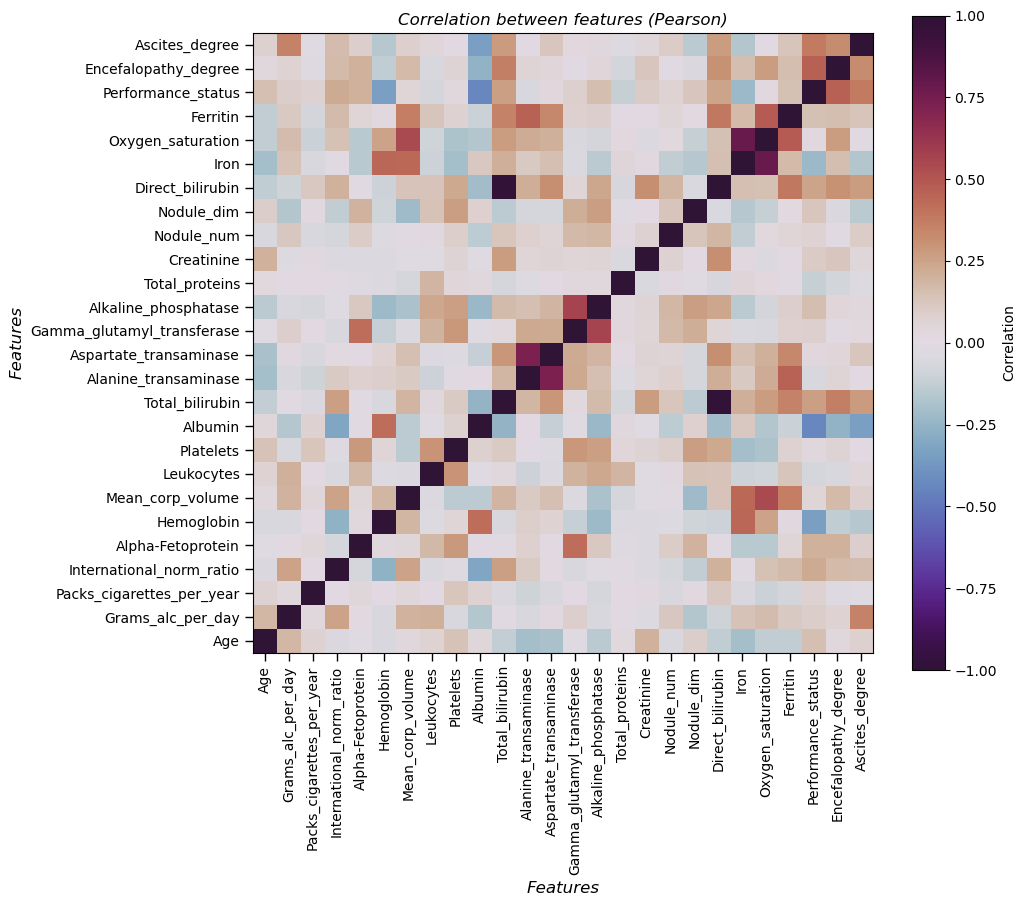

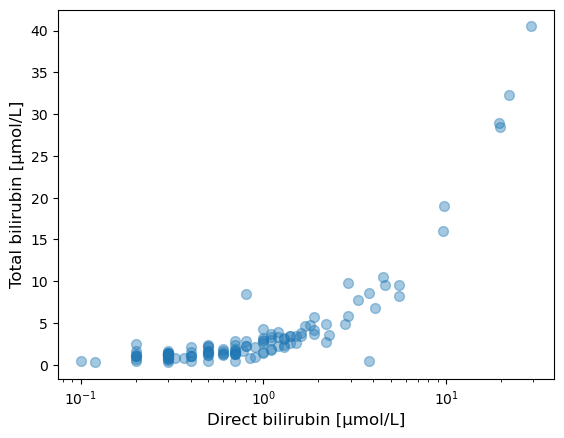

In [11]:
corr_df=X[std_ftrs+ord_ftrs].corr(method='pearson')
# print(corr_df)
plt.figure(figsize=(10,10))
plt.imshow(corr_df, origin='lower',vmin=-1, cmap='twilight_shifted') 
plt.xlabel('Features',fontsize='large',fontstyle='oblique')
plt.ylabel('Features',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both',labelsize=10, width=1, length=6)
plt.xticks(np.arange(0, len(X[std_ftrs+ord_ftrs].columns),1),X[std_ftrs+ord_ftrs].columns,rotation=90)
plt.yticks(np.arange(0, len(X[std_ftrs+ord_ftrs].columns),1),X[std_ftrs+ord_ftrs].columns)
#plt.clim(-1,1)
plt.colorbar(label='Correlation',shrink=.85, cmap='twilight_shifted')
plt.title('Correlation between features (Pearson)',fontsize='large',fontstyle='oblique')
plt.savefig(os.path.join(filepath,'figures','fig8.png'), dpi=300, bbox_inches = "tight")
df.plot.scatter('Direct_bilirubin','Total_bilirubin',s=50,alpha=0.4)
plt.xlabel('Direct bilirubin [µmol/L]',fontsize='large')
plt.ylabel('Total bilirubin [µmol/L]',fontsize='large')
plt.semilogx()
plt.savefig(os.path.join(filepath,'figures','fig9.png'), dpi=300, bbox_inches = "tight")

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Splitting and preprocessing

rs=1
X_test,X_other,y_test,y_other=train_test_split(X,y,train_size=.2,random_state=rs,shuffle=True)
# print('x_test: ',X_test.shape)

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore',drop='if_binary'), cat_ftrs),
        ('std', StandardScaler(), std_ftrs)],
    remainder='passthrough',verbose_feature_names_out=False)

processor = Pipeline(steps=[('preprocessor', preprocessor)])


# preprocessor_dropped = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore',drop='if_binary'), cat_ftrs_dropped),
#         ('std', StandardScaler(), std_ftrs_dropped)],
#     remainder='passthrough',verbose_feature_names_out=False)

# processor_dropped = Pipeline(steps=[('preprocessor', preprocessor_dropped)])

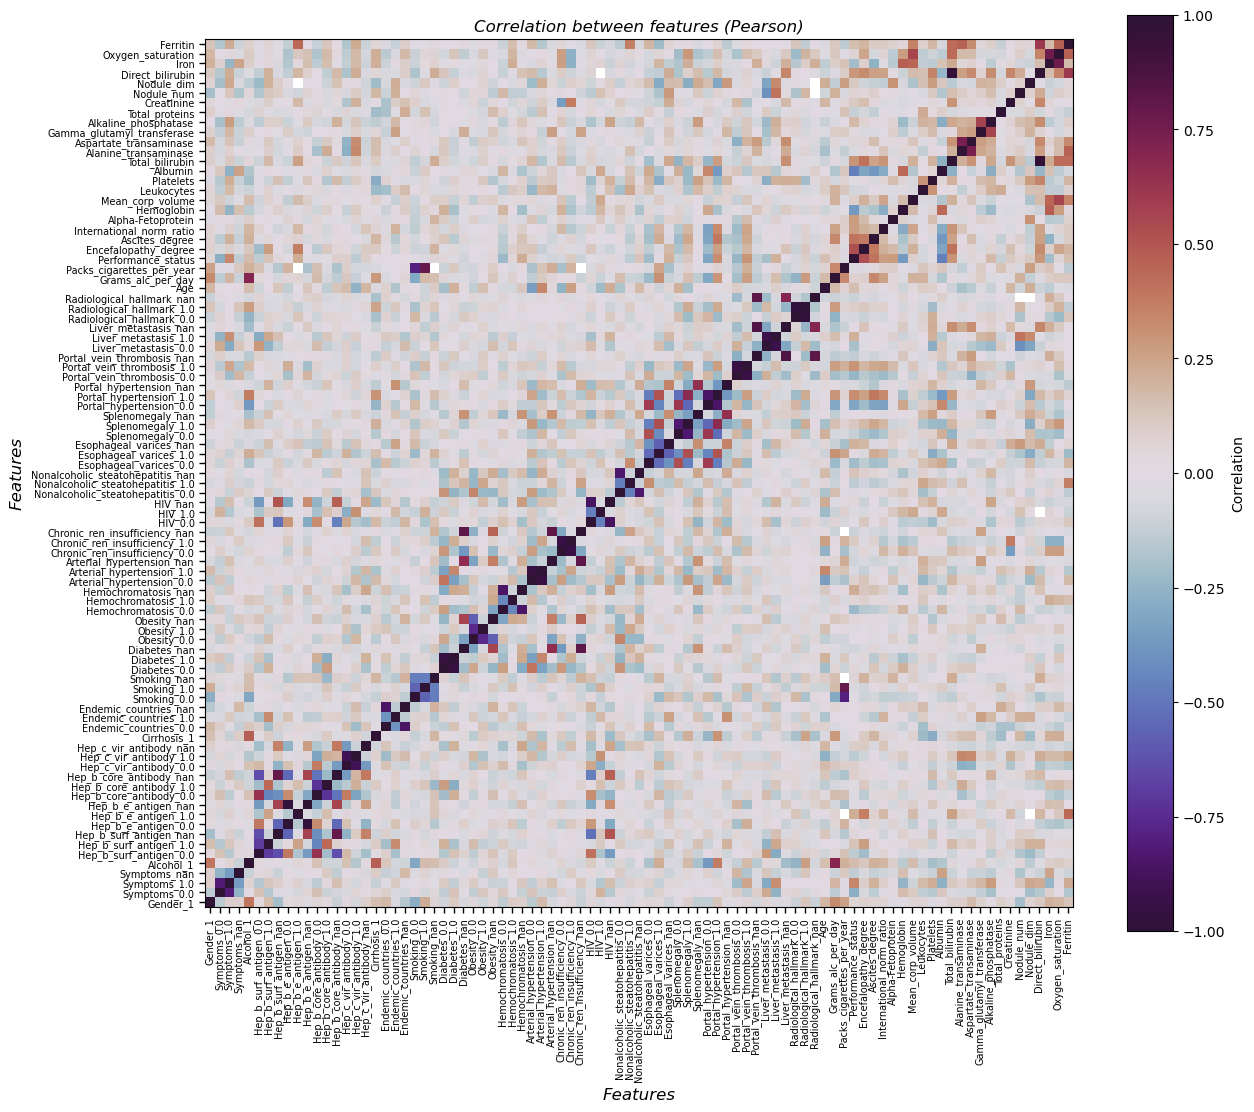

Hep_b_e_antigen_nan   -0.979366
Name: Hep_b_e_antigen_0.0, dtype: float64
Hep_b_e_antigen_0.0   -0.979366
Name: Hep_b_e_antigen_nan, dtype: float64
Diabetes_1.0   -0.950407
Name: Diabetes_0.0, dtype: float64
Diabetes_0.0   -0.950407
Name: Diabetes_1.0, dtype: float64
Arterial_hypertension_1.0   -0.951855
Name: Arterial_hypertension_0.0, dtype: float64
Arterial_hypertension_0.0   -0.951855
Name: Arterial_hypertension_1.0, dtype: float64
Chronic_ren_insufficiency_1.0   -0.937644
Name: Chronic_ren_insufficiency_0.0, dtype: float64
Chronic_ren_insufficiency_0.0   -0.937644
Name: Chronic_ren_insufficiency_1.0, dtype: float64
Portal_vein_thrombosis_1.0   -0.938006
Name: Portal_vein_thrombosis_0.0, dtype: float64
Portal_vein_thrombosis_0.0   -0.938006
Name: Portal_vein_thrombosis_1.0, dtype: float64
Liver_metastasis_1.0   -0.919054
Name: Liver_metastasis_0.0, dtype: float64
Liver_metastasis_0.0   -0.919054
Name: Liver_metastasis_1.0, dtype: float64
Radiological_hallmark_1.0   -0.966479
Name: 

In [27]:
X_train_prep=pd.DataFrame(processor.fit_transform(X_other), columns=preprocessor.get_feature_names_out())

corr_df=X_train_prep.corr(method='pearson')
# print(corr_df)
plt.figure(figsize=(14,14))
plt.imshow(corr_df, origin='lower',vmin=-1, cmap='twilight_shifted') 
plt.xlabel('Features',fontsize='large',fontstyle='oblique')
plt.ylabel('Features',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both',labelsize=7, width=1, length=4)
plt.xticks(np.arange(0, len(X_train_prep.columns),1),X_train_prep.columns,rotation=90)
plt.yticks(np.arange(0, len(X_train_prep.columns),1),X_train_prep.columns)
#plt.clim(-1,1)
plt.colorbar(label='Correlation',shrink=.85, cmap='twilight_shifted')
plt.title('Correlation between features (Pearson)',fontsize='large',fontstyle='oblique')
# plt.savefig(os.path.join(filepath,'figures','fig12.png'), dpi=300, bbox_inches = "tight")
plt.show()

for ftr in corr_df.columns:
    high_corr=corr_df[(abs(corr_df[ftr])>.9)&(abs(corr_df[ftr])<1)][ftr]
    if len(high_corr)>0:
        print(high_corr)

In [ ]:
X_dropped1=X.copy()
X_dropped1.drop('Direct_bilirubin',axis=1,inplace=True)
cat_ftrs_dropped1=list(set(cat_ftrs)-set('Direct_bilirubin'))
ord_ftrs_dropped1=list(set(ord_ftrs)-set('Direct_bilirubin'))
std_ftrs_dropped1=list(set(std_ftrs)-set('Direct_bilirubin'))

X_dropped2=X.copy()
X_dropped2.drop('Direct_bilirubin',axis=1, inplace=True)
X_dropped2.drop('Smoking', axis=1, inplace=True)
cat_ftrs_dropped2=list(set(cat_ftrs)-set(['Direct_bilirubin','Smoking']))
ord_ftrs_dropped2=list(set(ord_ftrs)-set(['Direct_bilirubin','Smoking']))
std_ftrs_dropped2=list(set(std_ftrs)-set(['Direct_bilirubin','Smoking']))

# X_dropped3=X.copy()
# most_missing=list((X.isnull().sum(axis=0)).sort_values(ascending=False)[:5].index)
# for ftr in most_missing:
#     X_dropped3.drop(ftr,axis=1, inplace=True)

# cat_ftrs_dropped3=list(set(cat_ftrs)-set(most_missing))
# ord_ftrs_dropped3=list(set(ord_ftrs)-set(most_missing))
# std_ftrs_dropped3=list(set(std_ftrs)-set(most_missing))


In [6]:
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import pickle
import os

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore',drop='if_binary'), cat_ftrs),
        ('scaler',StandardScaler(),std_ftrs)],
    remainder='passthrough',verbose_feature_names_out=False)

processor = Pipeline(steps=[('preprocessor', preprocessor)])

param_grid = {"learning_rate": [0.01, 0.03, .05, 0.1, 0.2, 0.3],
               "n_estimators": [10000],
               "reg_alpha": [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
               "reg_lambda": [1e-3 , 1e-2, 1e-1, 1e0, 1e1, 1e2],
               "missing": [np.nan], 
               "max_depth": [1,3,6,10,30],
               "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
               "subsample": [0.5, 0.66, 0.75]}
    
params = ParameterGrid(param_grid)
best_models=[]
test_scores=[]
X_tests=[]
y_tests=[]
y_preds=[]

for rs in range(10):
    X_train,X_other,y_train,y_other=train_test_split(X,y,train_size=.6,random_state=rs,shuffle=True)
    X_test,X_val,y_test,y_val=train_test_split(X_other,y_other,train_size=.5,random_state=rs,shuffle=True)
    
    X_train_prep=pd.DataFrame(processor.fit_transform(X_train),columns=processor.get_feature_names_out())
    columns=processor.get_feature_names_out()
    X_val_prep=pd.DataFrame(processor.transform(X_val),columns=columns)
    X_test_prep=pd.DataFrame(processor.transform(X_test),columns=columns)
    X_tests.append(X_test_prep)
    y_tests.append(y_test)

    scores = np.zeros(len(params))
    XGB = xgboost.XGBClassifier(seed=rs,use_label_encoder=False, eval_metric='logloss')

    for i in range(len(params)):
        param_set = params[i]
        XGB.set_params(**param_set)
        XGB.fit(X_train_prep, y_train, early_stopping_rounds=50, eval_set=[(X_val_prep,y_val)], verbose=False)
        y_val_pred = XGB.predict(X_val_prep, ntree_limit=XGB.best_ntree_limit)
        scores[i] = accuracy_score(y_val,y_val_pred)

    best_params = np.array(params)[scores == np.max(scores)]
    
    XGB = xgboost.XGBClassifier(seed=rs,use_label_encoder=False, eval_metric='logloss')
    XGB.set_params(**best_params[0])
    XGB.fit(X_train_prep,y_train, early_stopping_rounds=50,eval_set=[(X_val_prep,y_val)], verbose=False)
    best_models.append(XGB)
    y_pred=XGB.predict(X_test_prep, ntree_limit=XGB.best_ntree_limit)
    test_scores.append(accuracy_score(y_test,y_pred))
    y_preds.append(y_pred)

print('mean test score:',np.mean(test_scores))
print(test_scores)
print('std dev:',np.std(test_scores))

file = open(os.path.join(filepath,'results','XGB.save'), 'wb') 
pickle.dump((best_models,test_scores,X_tests,y_tests,y_preds),file)
file.close()

mean test score: 0.7030303030303031
[0.6666666666666666, 0.7878787878787878, 0.6666666666666666, 0.6666666666666666, 0.696969696969697, 0.696969696969697, 0.7575757575757576, 0.696969696969697, 0.696969696969697, 0.696969696969697]
std dev: 0.03784847271756605


In [5]:
import warnings 

warnings.filterwarnings("ignore")

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,roc_auc_score,fbeta_score
from sklearn.model_selection import GridSearchCV

def reduced_feature_pipeline(X, y, cat_ftrs, ord_ftrs, preprocessor, model, params):
    all_best_models=[]
    X_tests=[]
    y_tests=[]
    y_test_preds=[]
    test_accuracies=[]
    
    #don't want to do reduced feature patterns for missing categorical values -> fill with unused integer
    imputer = ColumnTransformer(transformers=[
            ('cat_imputer', SimpleImputer(strategy='constant',fill_value=7), cat_ftrs+ord_ftrs)],
                                       remainder='passthrough',verbose_feature_names_out=False)
    X_prep=pd.DataFrame(imputer.fit_transform(X), columns=imputer.get_feature_names_out())

    for rs in range(10):
        best_models=[]
        kf = KFold(n_splits=5,shuffle=True,random_state=rs)

        X_test,X_other,y_test,y_other=train_test_split(X_prep,y,train_size=.2,random_state=rs,shuffle=True)
        X_test.reset_index(drop=True,inplace=True)
        y_test.reset_index(drop=True,inplace=True)
        X_other.reset_index(drop=True,inplace=True)
        y_other.reset_index(drop=True,inplace=True)
            
        mask = X_test.isnull()
        unique_rows = np.array(np.unique(mask, axis=0))
        all_y_test_pred = pd.DataFrame()
        all_y_test_subs = pd.DataFrame()
        all_X_test_subs = pd.DataFrame()
        
        for i in range(len(unique_rows)):
            X_test_subset = pd.DataFrame()
            y_test_subset = pd.Series(dtype=int)
            for j in range(len(mask)):
                row_mask=np.array(mask.iloc[j])
                if np.array_equal(row_mask,unique_rows[i]):
                    X_test_subset = X_test_subset.append(X_test.iloc[j])
                    y_test_subset = y_test_subset.append(y_test.iloc[[j]])
            
            X_test_subset = X_test_subset[X_test.columns[~unique_rows[i]]]
            X_other_subset = pd.DataFrame(X_other[X_other.columns[~unique_rows[i]]])
            X_other_subset = X_other_subset.dropna()
            y_other_subset = y_other.iloc[X_other_subset.index]
            
            pipeline=make_pipeline(preprocessor,model)
            grid = GridSearchCV(pipeline, param_grid=params,scoring = 'accuracy',cv=kf,error_score='raise')
            grid.fit(X_other_subset, y_other_subset)

            best_models.append(grid.best_estimator_)
            y_test_pred = pd.DataFrame(grid.predict(X_test_subset))
            all_y_test_pred=pd.concat([all_y_test_pred, y_test_pred])
            all_y_test_subs=pd.concat([all_y_test_subs,y_test_subset], ignore_index=True)
            all_X_test_subs=pd.concat([all_X_test_subs,X_test_subset],ignore_index=True)
        
        all_best_models.append(best_models)
        all_X_test_subs.reset_index(drop=True,inplace=True)
        all_y_test_subs.reset_index(drop=True,inplace=True)
        all_y_test_pred.reset_index(drop=True,inplace=True)
        y_test_preds.append(all_y_test_pred)
        X_tests.append(all_X_test_subs)
        y_tests.append(all_y_test_subs)
        test_accuracies.append(accuracy_score(all_y_test_subs,all_y_test_pred))
        
    return (all_best_models,test_accuracies,X_tests,y_tests,y_test_preds)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings 
warnings.filterwarnings("ignore")

rs=0

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore',drop='if_binary'), cat_ftrs)],
    remainder='passthrough',verbose_feature_names_out=False)

processor = Pipeline(steps=[('preprocessor', preprocessor),('scaler', StandardScaler())])

weights1={1:0.4,0:0.6}
weights2='balanced'
weights3=None


# logistic regression with l1 regularization
clf=LogisticRegression(random_state=rs,max_iter=10000, penalty='l1',solver='saga')
params={'logisticregression__C':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
        'logisticregression__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X,y,cat_ftrs,ord_ftrs,processor,clf,params)
print('Average test scores for LogReg (L1):',np.mean(scores))
print('Std deviation of test scores for LogReg (L1):',np.std(scores))

file = open(os.path.join(filepath,'results','logReg_L1.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# logistic regression with l2 regularization
clf=LogisticRegression(random_state=rs,max_iter=10000, penalty='l2', solver='saga')
params={'logisticregression__C':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
        'logisticregression__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X,y,cat_ftrs,ord_ftrs,processor,clf,params)
print('Average test score for LogReg (L2):',np.mean(scores))
print('Std deviation of test scores for LogReg (L2):',np.std(scores))

file = open(os.path.join(filepath,'results','logReg_L2.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# logistic regression with an elastic net
clf=LogisticRegression(random_state=rs,max_iter=10000, penalty='elasticnet', solver='saga')
params={'logisticregression__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
       'logisticregression__l1_ratio': [0.1,0.25,0.5,0.75,.9],
        'logisticregression__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X,y,cat_ftrs,ord_ftrs,processor,clf,params)
print('Average test score for Elastic Net:',np.mean(scores))
print('Std deviation of test scores for Elastic Net:',np.std(scores))

file = open(os.path.join(filepath,'results','logReg_elasticNet.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# RF
clf=RandomForestClassifier(random_state=rs)
params={'randomforestclassifier__max_depth': [1, 3, 10, 30, 100],
        'randomforestclassifier__max_features': [0.25,0.5,0.75,1.0],
       'randomforestclassifier__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X,y,cat_ftrs,ord_ftrs,processor,clf,params)
print('Average test score for Random Forest:',np.mean(scores))
print('Std deviation of test scores for Random Forest:',np.std(scores))

file = open(os.path.join(filepath,'results','RF.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# SVC
clf=SVC()
params={'svc__C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
       'svc__gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1],
       'svc__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X,y,cat_ftrs,ord_ftrs,processor,clf,params)
print('Average test score for SVC:',np.mean(scores))
print('Std deviation of test scores for SVC:',np.std(scores))

file = open(os.path.join(filepath,'results','SVC.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# k nearest neighbor regression
clf=KNeighborsClassifier()
params={'kneighborsclassifier__n_neighbors': [3, 5, 10],
       'kneighborsclassifier__weights': ['uniform','distance']}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X,y,cat_ftrs,ord_ftrs,processor,clf,params)
print('Average test score for K Nearest Neighbors:',np.mean(scores))
print('Std deviation of test scores for K Nearest Neighbors:',np.std(scores))

file = open(os.path.join(filepath,'results','kNearestNeighbor.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()

Average test scores for LogReg (L1): 0.6727272727272728
Std deviation of test scores for LogReg (L1): 0.05717564322458547
Average test score for LogReg (L2): 0.6939393939393941
Std deviation of test scores for LogReg (L2): 0.08181818181818182
Average test score for Elastic Net: 0.7181818181818183
Std deviation of test scores for Elastic Net: 0.06645973393776154
Average test score for Random Forest: 0.6818181818181819
Std deviation of test scores for Random Forest: 0.08912388587789541
Average test score for SVC: 0.6484848484848486
Std deviation of test scores for SVC: 0.047334846520646394
Average test score for K Nearest Neighbors: 0.6545454545454547
Std deviation of test scores for K Nearest Neighbors: 0.07808544682863712


In [ ]:
#remove highly correlated features

preprocessor_dropped2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore',drop='if_binary'), cat_ftrs_dropped2)],
    remainder='passthrough',verbose_feature_names_out=False)

processor_dropped2 = Pipeline(steps=[('preprocessor', preprocessor_dropped2),('scaler',StandardScaler())])

# logistic regression with l1 regularization
clf=LogisticRegression(random_state=rs,max_iter=10000, penalty='l1',solver='saga')
params={'logisticregression__C':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
        'logisticregression__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X_dropped2,y,cat_ftrs_dropped2,ord_ftrs_dropped2,processor_dropped2,clf,params)
print('Average test scores for LogReg (L1):',np.mean(scores))
print('Std deviation of test scores for LogReg (L1):',np.std(scores))

file = open(os.path.join(filepath,'results','logReg_L1_dropped2.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# logistic regression with l2 regularization
clf=LogisticRegression(random_state=rs,max_iter=10000, penalty='l2', solver='saga')
params={'logisticregression__C':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
        'logisticregression__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X_dropped2,y,cat_ftrs_dropped2,ord_ftrs_dropped2,processor_dropped2,clf,params)
print('Average test score for LogReg (L2):',np.mean(scores))
print('Std deviation of test scores for LogReg (L2):',np.std(scores))

file = open(os.path.join(filepath,'results','logReg_L2_dropped2.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# logistic regression with an elastic net
clf=LogisticRegression(random_state=rs,max_iter=10000, penalty='elasticnet', solver='saga')
params={'logisticregression__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
       'logisticregression__l1_ratio': [0.1,0.25,0.5,0.75,.9],
        'logisticregression__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X_dropped2,y,cat_ftrs_dropped2,ord_ftrs_dropped2,processor_dropped2,clf,params)
print('Average test score for Elastic Net:',np.mean(scores))
print('Std deviation of test scores for Elastic Net:',np.std(scores))

file = open(os.path.join(filepath,'results','logReg_elasticNet_dropped2.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# RF
clf=RandomForestClassifier(random_state=rs)
params={'randomforestclassifier__max_depth': [1, 3, 10, 30, 100],
        'randomforestclassifier__max_features': [0.25,0.5,0.75,1.0],
       'randomforestclassifier__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X_dropped2,y,cat_ftrs_dropped2,ord_ftrs_dropped2,processor_dropped2,clf,params)
print('Average test score for Random Forest:',np.mean(scores))
print('Std deviation of test scores for Random Forest:',np.std(scores))

file = open(os.path.join(filepath,'results','RF_dropped2.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# SVC
clf=SVC()
params={'svc__C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
       'svc__gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1],
       'svc__class_weight':[weights1, weights2, weights3]}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X_dropped2,y,cat_ftrs_dropped2,ord_ftrs_dropped2,processor_dropped2,clf,params)
print('Average test score for SVC:',np.mean(scores))
print('Std deviation of test scores for SVC:',np.std(scores))

file = open(os.path.join(filepath,'results','SVC_dropped2.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()


# k nearest neighbor regression
clf=KNeighborsClassifier()
params={'kneighborsclassifier__n_neighbors': [3, 5, 10],
       'kneighborsclassifier__weights': ['uniform','distance']}

models,scores,X_tests,y_tests,y_test_preds=reduced_feature_pipeline(X_dropped2,y,cat_ftrs_dropped2,ord_ftrs_dropped2,processor_dropped2,clf,params)
print('Average test score for K Nearest Neighbors:',np.mean(scores))
print('Std deviation of test scores for K Nearest Neighbors:',np.std(scores))

file = open(os.path.join(filepath,'results','kNearestNeighbor_dropped2.save'), 'wb') 
pickle.dump((models,scores,X_tests,y_tests,y_test_preds),file)
file.close()

In [127]:
import pickle
file = open(os.path.join(filepath,'results','XGB.save'), 'rb')
models,test_scores,X_tests,y_tests,y_preds = pickle.load(file)
file.close()


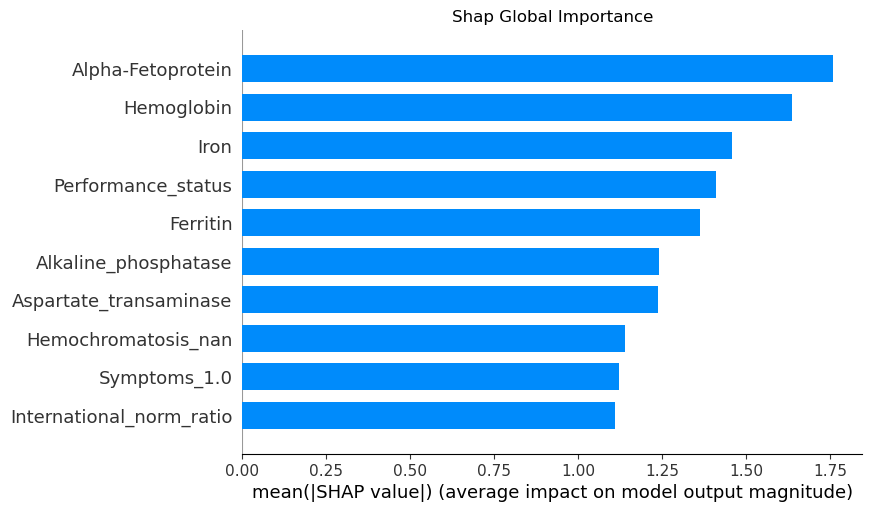

In [117]:
import shap
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore',drop='if_binary'), cat_ftrs),
        ('scaler',StandardScaler(),std_ftrs)],
    remainder='passthrough',verbose_feature_names_out=False)

processor = Pipeline(steps=[('preprocessor', preprocessor)])
processor.fit(X_train)

values_list=[]
for i in range(len(models)):
    dict1={}
    XGB=models[i]
    features=XGB.get_booster().feature_names
    shap.initjs() 
    explainer = shap.TreeExplainer(XGB)
    values = explainer.shap_values(X_tests[i])
    temp=pd.DataFrame(values,columns=features)
    importances.append(temp)

imprt_df=pd.concat(importances)
imprt_df.fillna(0,inplace=True)
value_ary=imprt_df.to_numpy()
fig=shap.summary_plot(value_ary, feature_names=imprt_df.columns, max_display=10, plot_type='bar',show=False)
plt.title('Shap Global Importance')
plt.savefig(os.path.join(filepath,'figures','shap_summary.png'), dpi=300, bbox_inches = "tight")
plt.show()


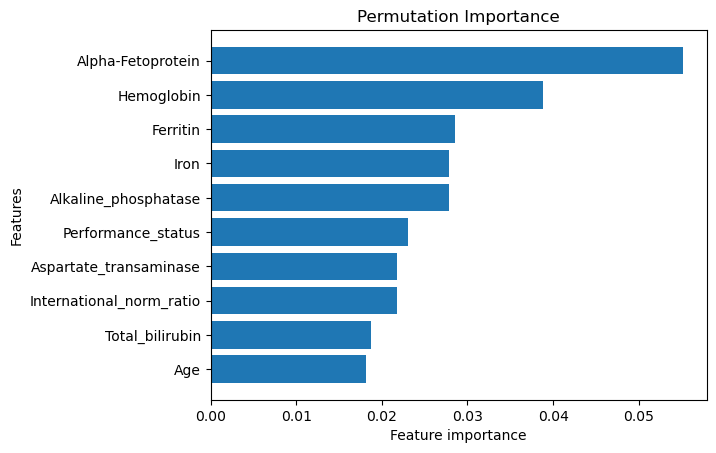

In [128]:
from sklearn.inspection import permutation_importance
import warnings
import matplotlib
from matplotlib import pylab as plt

warnings.simplefilter("ignore", category=FutureWarning)
rs=1

importances=[]
for i in range(len(models)):
    XGB=models[i]
    X_test_mod=X_tests[i][XGB.get_booster().feature_names]
    columns=X_test_mod.columns
    import_ary=permutation_importance(XGB,X_test_mod, y_tests[i], random_state=i, scoring='accuracy')
    means=np.abs(import_ary.importances_mean)
    dict1={}
    for i in range(len(means)):
        col=columns[i]
        dict1.update({col:[means[i]]})
    importances.append(pd.DataFrame(dict1))

imprt_df=pd.concat(importances)
imprt_df.fillna(0,inplace=True)
ylist=imprt_df.mean().sort_values(ascending=True)
xlist=ylist.index

plt.barh(xlist[-10:],ylist[-10:])
plt.ylabel('Features')
plt.xlabel('Feature importance')
plt.title('Permutation Importance')
plt.savefig(os.path.join(filepath,'figures','permutation_impt.png'), dpi=300, bbox_inches = "tight")
plt.show()

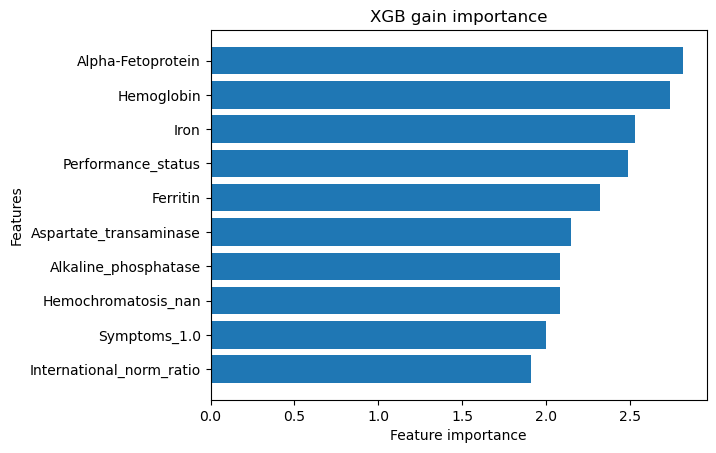

In [129]:
impt_type = 'gain'
importances=[]
imprt_df=pd.DataFrame()
for XGB in models:  
    importance=XGB.get_booster().get_score(importance_type = impt_type)
    abs_importance={key: abs(val) for key, val in importance.items()}
    importances.append(pd.DataFrame(abs_importance,index=range(len(abs_importance))))

imprt_df=pd.concat(importances)
imprt_df.fillna(0,inplace=True)
ylist=imprt_df.mean().sort_values(ascending=True)
xlist=ylist.index

plt.barh(xlist[-10:],ylist[-10:])
plt.ylabel('Features')
plt.xlabel('Feature importance')
plt.title('XGB gain importance')
plt.savefig(os.path.join(filepath,'figures','XGB_gain.png'), dpi=300, bbox_inches = "tight")
plt.show()

In [34]:
index=0
XGB=models[0]
shap.initjs() 
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_tests[0])
shap.force_plot(explainer.expected_value, shap_values[index], features = X_tests[0].iloc[index],feature_names = X_tests[0].columns, link='logit')

In [120]:
index=10
XGB=models[0]
shap.initjs() 
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_tests[0])
shap.force_plot(explainer.expected_value, shap_values[index], features = X_tests[0].iloc[index],feature_names = X_tests[0].columns, link='logit')

In [121]:
index=20
XGB=models[0]
shap.initjs() 
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_tests[0])
shap.force_plot(explainer.expected_value, shap_values[index], features = X_tests[0].iloc[index],feature_names = X_tests[0].columns, link='logit')

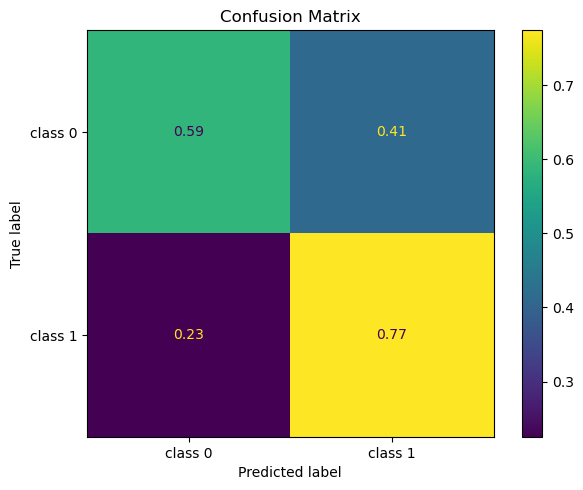

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay

y_true_all=np.ndarray.flatten(np.array(y_tests))
y_pred_all=np.ndarray.flatten(np.array(y_preds))

ConfusionMatrixDisplay.from_predictions(y_true_all,y_pred_all,display_labels=['class 0', 'class 1'],normalize='true')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.savefig(os.path.join(filepath,'figures','conf_matrix.png'), dpi=300, bbox_inches = "tight")
plt.show()

# index=3
# ConfusionMatrixDisplay.from_predictions(y_tests[index],y_preds[index],display_labels=['class 0', 'class 1'],normalize='true')
# plt.tight_layout()
# plt.title('Confusion Matrix')
# plt.show()

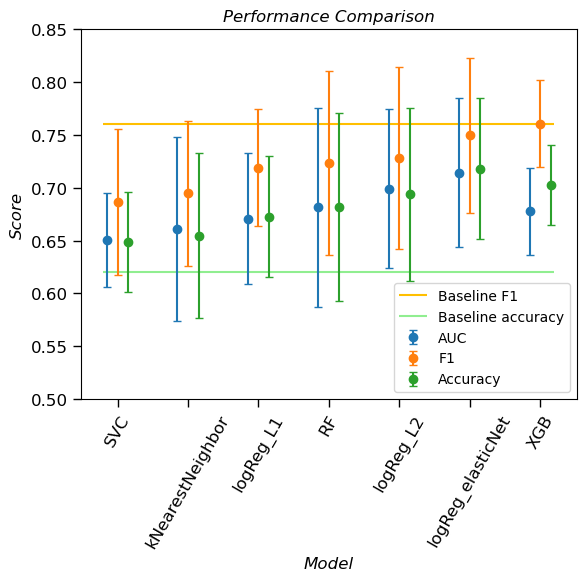

In [125]:
auc_means=[]
auc_stds=[]
fbeta_means=[]
fbeta_stds=[]
acc_means=[]
acc_stds=[]
model_types=['SVC','kNearestNeighbor','logReg_L1','RF','logReg_L2','logReg_elasticNet','XGB']
for model in model_types:
    file = open(os.path.join(filepath,'results','%s.save' %model), 'rb')
    models,test_scores,X_tests,y_tests,y_preds = pickle.load(file)
    file.close()
    aucs=[]
    f_betas=[]
    for i in range(10):
        aucs.append(roc_auc_score(y_tests[i],y_preds[i]))
        f_betas.append(fbeta_score(y_tests[i],y_preds[i],beta=1))
    auc_means.append(np.mean(aucs))
    auc_stds.append(np.std(aucs))
    fbeta_means.append(np.mean(f_betas))
    fbeta_stds.append(np.std(f_betas))
    acc_means.append(np.mean(test_scores))
    acc_stds.append(np.std(test_scores))

#baseline accuracy: 63/165 = 0.62
#baseline F1: 2(102/267) = 0.76
plt.hlines(0.76,-.2,len(model_types)-.8,color='#FFBF00',label='Baseline F1')
plt.hlines(0.62,-.2,len(model_types)-.8,color='#90EE90',label='Baseline accuracy')
plt.errorbar([x-.15 for x in range(len(model_types))],auc_means,yerr=auc_stds,linestyle="",marker='o',capsize=3,label='AUC')
plt.errorbar(range(len(model_types)),fbeta_means,yerr=fbeta_stds,linestyle="",marker='o',capsize=3,label='F1')
plt.errorbar([x+.15 for x in range(len(model_types))],acc_means,yerr=acc_stds,linestyle="",marker='o',capsize=3,label='Accuracy')
plt.title('Performance Comparison',fontsize='large',fontstyle='oblique')
plt.xticks(range(len(model_types)),model_types,rotation=60)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.ylabel('Score',fontsize='large',fontstyle='oblique')
plt.xlabel('Model',fontsize='large',fontstyle='oblique')
plt.ylim(.5,.85)
plt.legend()
plt.savefig(os.path.join(filepath,'figures','fig23.png'), dpi=300, bbox_inches = "tight")
plt.show()

